### Install vaex, dask, pandas, numpy and memory_profiler

In [ ]:
!pip install --user vaex memory_profiler dask pandas numpy

### Load memory profiler to check peak memory footprint

In [1]:
%load_ext memory_profiler

### Introduction to vaex

- Load a 107GB HDF5 file with 1Billion rows on a machine with 8GB RAM
- Get shape, columns, and value counts on some of the columns
- Tutorial [here](https://vaex.readthedocs.io/en/latest/datasets.html)

In [2]:
import vaex

In [3]:
large_df = vaex.open('s3://vaex/taxi/yellow_taxi_2015_f32s.hdf5?anon=true')

In [4]:
%%memit

print(large_df.shape)

(146112991, 18)
(146112991, 18)
(146112991, 18)
(146112991, 18)
(146112991, 18)
(146112991, 18)
(146112991, 18)
peak memory: 135.32 MiB, increment: 0.71 MiB


In [5]:
large_df.columns

{'dropoff_datetime': <vaex.file.column.ColumnFile at 0x7f3424daac10>,
 'dropoff_latitude': <vaex.file.column.ColumnFile at 0x7f3424daafd0>,
 'dropoff_longitude': <vaex.file.column.ColumnFile at 0x7f3424dbd0d0>,
 'fare_amount': <vaex.file.column.ColumnFile at 0x7f3424dbd1d0>,
 'mta_tax': <vaex.file.column.ColumnFile at 0x7f3424dbd2d0>,
 'passenger_count': <vaex.file.column.ColumnFile at 0x7f3424dbd510>,
 'payment_type': <vaex.column.ColumnStringArrow at 0x7f3424dbd910>,
 'pickup_datetime': <vaex.file.column.ColumnFile at 0x7f3424dbdc50>,
 'pickup_latitude': <vaex.file.column.ColumnFile at 0x7f3424dbd390>,
 'pickup_longitude': <vaex.file.column.ColumnFile at 0x7f3424dbdb90>,
 'rate_code': <vaex.file.column.ColumnFile at 0x7f3424dbdd10>,
 'store_and_fwd_flag': <vaex.file.column.ColumnFile at 0x7f3424dbde10>,
 'surcharge': <vaex.file.column.ColumnFile at 0x7f3424dc9150>,
 'tip_amount': <vaex.file.column.ColumnFile at 0x7f3424dc9250>,
 'tolls_amount': <vaex.file.column.ColumnFile at 0x7f342

In [6]:
large_df['vendor_id'].value_counts()

VTS    76658635
CMT    69454356
dtype: int64

## HDF5 - Hierarchical Data Format

<img src="https://www.hdfgroup.org/wp-content/uploads/2017/06/benefits-wheel.png" alt="drawing" width="400"/>


More info [here](https://www.hdfgroup.org/)

## Hierarchical Structure - A file directory within a file

<img src="https://www.neonscience.org/sites/default/files/images/HDF5/hdf5_structure4.jpg" alt="drawing" width="600">

[Reference](https://www.hdfgroup.org/)

## Solution architecture for EDA on one large CSV File

![solution_architecture](single_csv_to_hdf5.png)


## Resources - Storage & Compute (Cores + Memory)
- Need 2-4x CSV file size on storage to store intermediate HDF5 files and the final HDF5 file
- For example: If the CSV file size is 7GB then you will need an additional 14GB (2 x 7 GB) in disk space
- Chunk size has to fit in memory

### Convert a CSV file to a HDF5 file

In [7]:
csv_file = "OP_DTL_GNRL_PGYR2019_P06302020.csv"

## Find optimal chunk size - this step is iterative and takes time
1. Use different chunk_sizes in decreasing order of the size 1M, 500K, 250K, 100K
2. Use dtype=str to avoid problems mixed data types in vaex.from_csv
3. Use the chunk_size that fits in memory

In [19]:
%%memit
chunk_size = 500000
#full_vaex_df = vaex.from_csv(csv_file,chunk_size=chunk_size,dtype=str,convert=True)
full_vaex_df = vaex.open("OP_DTL_GNRL_PGYR2019_P06302020.csv.hdf5")

peak memory: 1608.07 MiB, increment: 2.13 MiB


### Once the CSV file is converted to HDF5, column operations for EDA will be fast

In [20]:
#vaex_df = vaex.open('medicare_all_1.csv.hdf5')
full_vaex_df

#,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,Recipient_Postal_Code,Physician_Primary_Type,Physician_Specialty,Physician_License_State_code1,Physician_License_State_code2,Physician_License_State_code3,Physician_License_State_code4,Physician_License_State_code5,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Total_Amount_of_Payment_USDollars,Date_of_Payment,Number_of_Payments_Included_in_Total_Amount,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Physician_Ownership_Indicator,Third_Party_Payment_Recipient_Indicator,Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value,Charity_Indicator,Third_Party_Equals_Covered_Recipient_Indicator,Contextual_Information,Delay_in_Publication_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Covered_or_Noncovered_Indicator_1,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Product_Category_or_Therapeutic_Area_1,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1,Associated_Drug_or_Biological_NDC_1,Covered_or_Noncovered_Indicator_2,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2,Product_Category_or_Therapeutic_Area_2,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2,Associated_Drug_or_Biological_NDC_2,Covered_or_Noncovered_Indicator_3,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3,Product_Category_or_Therapeutic_Area_3,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3,Associated_Drug_or_Biological_NDC_3,Covered_or_Noncovered_Indicator_4,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Program_Year,Payment_Publication_Date
0,NEW,Covered Recipient Physician,None,None,None,827477,STEPHEN,W.,BOATRIGHT,None,6 WINDSONG DR,None,NORTH LITTLE ROCK,AR,72113-9203,United States,None,None,Doctor of Dentistry,Dental Providers|Dentist|Endodontics,AR,None,None,None,None,Edge Endo LLC,100000026244,Edge Endo LLC,NM,United States,18.88,05/21/2019,1,In-kind items and services,Gift,None,None,None,No,No Third Party Payment,None,None,None,None,No,618989345,No,Yes,Covered,Device,General Dental and Oral Health,EdgeOne Fire,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2019,06/30/2020
1,NEW,Covered Recipient Physician,None,None,None,623090,JASON,None,FOREMAN,None,2916 CROSSING CT STE C,None,CHAMPAIGN,IL,61822-5900,United States,None,None,Doctor of Dentistry,Dental Providers|Dentist|Endodontics,IL,None,None,None,None,Edge Endo LLC,100000026244,Edge Endo LLC,NM,United States,15.00,09/19/2019,1,In-kind items and services,Gift,None,None,None,No,No Third Party Payment,None,None,None,None,No,618989347,No,Yes,Covered,Device,Not Applicable,T-Shirt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2019,06/30/2020
2,NEW,Covered Recipient Physician,None,None,None,3362255,MAURICE,None,HAMAOUI,None,2230 E 13TH ST,None,BROOKLYN,NY,11229,United States,None,None,Doctor of Dentistry,Dental Providers|Dentist,NY,N

In [28]:
%%time
vdf = full_vaex_df[['Total_Amount_of_Payment_USDollars','Recipient_City','Covered_Recipient_Type']]

CPU times: user 255 µs, sys: 21 µs, total: 276 µs
Wall time: 284 µs


In [31]:
vdf['Total_Amount_of_Payment_USDollars'] = vdf['Total_Amount_of_Payment_USDollars'].astype('float')

In [34]:
vdf.describe()

,Total_Amount_of_Payment_USDollars,Recipient_City,Covered_Recipient_Type
dtype,float64,str,str
count,10367307,10367307,10367307
NA,0,0,0
mean,343.7340928883819,--,--
std,114045,--,--
min,0.01,--,--
max,3e+08,--,--


In [35]:
df_2 = vdf.groupby(by=["Covered_Recipient_Type","Recipient_City"], agg = {"total_payment": vaex.agg.mean("Total_Amount_of_Payment_USDollars")})

In [41]:
pd_df = df_2.to_pandas_df()
pd_df = pd_df.sort_values(by=['total_payment'],ascending=False)

In [37]:
import seaborn as sns

In [38]:
%matplotlib inline

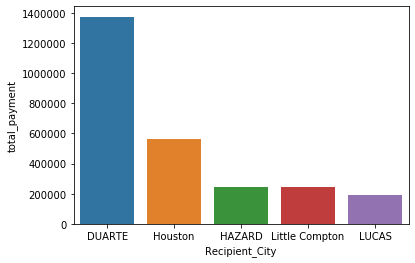

In [42]:
ax = sns.barplot(x="Recipient_City",y="total_payment",data=pd_df.head(5))

In [45]:
payments = full_vaex_df["Total_Amount_of_Payment_USDollars"].to_pandas_series().astype('float')

In [46]:
removed_outliers = payments.between(payments.quantile(.05), payments.quantile(.95))

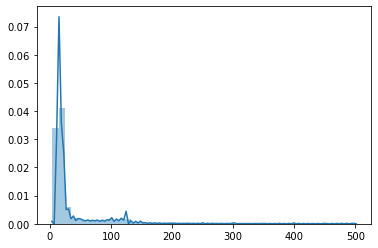

In [47]:
ax = sns.distplot(payments[removed_outliers])